In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../cleaned_kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Nothing here,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,Nothing here,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Questions
1. Does geography effect housing price?

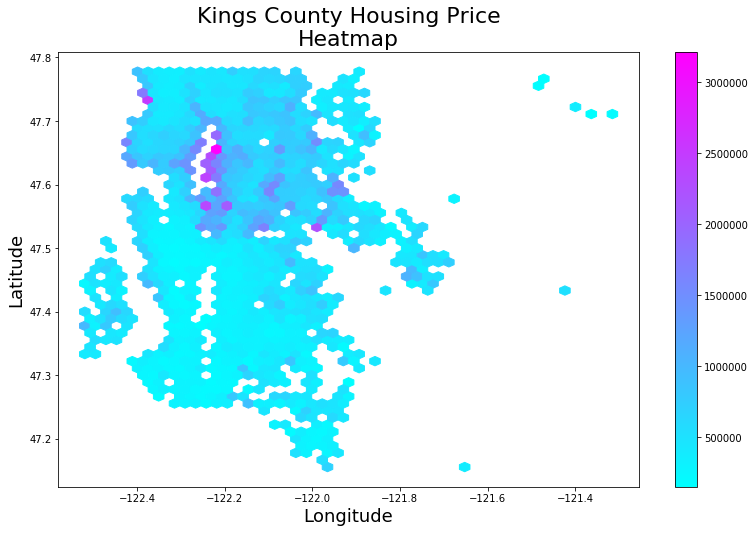

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
df.plot.hexbin(x='long', y='lat', C='price',gridsize=50, ax=ax, cmap='cool')
ax.set_xlabel("Longitude", fontsize=18)
ax.set_ylabel("Latitude", fontsize=18)
ax.set_title("Kings County Housing Price\nHeatmap", fontsize=22)
plt.show()

In [24]:
fig.savefig("../images/latlon.png")

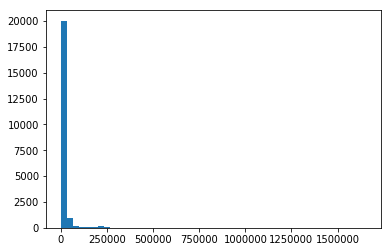

In [8]:
plt.hist(df['sqft_lot'], bins=50)
plt.show()

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df['log_sqft_living'] = np.log(df['sqft_living'])

In [12]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_sqft_living
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Nothing here,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7.073270
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7.851661
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,Nothing here,98028,47.7379,-122.233,2720,8062,6.646391
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7.580700
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,7.426549


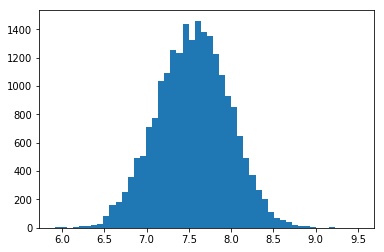

In [14]:
plt.hist(df['log_sqft_living'], bins=50)
plt.show()

In [15]:
X = df[['log_sqft_living', 'floors']]
y = df['price']

In [16]:
import statsmodels.api as sm

In [17]:
ols = sm.OLS(y, X)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.721
Model:                            OLS   Adj. R-squared (uncentered):              0.721
Method:                 Least Squares   F-statistic:                          2.792e+04
Date:                Tue, 11 Feb 2020   Prob (F-statistic):                        0.00
Time:                        14:30:01   Log-Likelihood:                     -3.0604e+05
No. Observations:               21597   AIC:                                  6.121e+05
Df Residuals:                   21595   BIC:                                  6.121e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
log_sqft_living  5.162e+04    958.148     53.873      0.000    4.97e+04    5.35e+04
floors           1.076e+05   4561.393     23.585      0.000    9.86e+04    1.17e+05
==============================================================================
Omnibus:                    20163.897   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1475922.836
Skew:                           4.320   Prob(JB):                         0.00
Kurtosis:                      42.566   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_scaled = scaler.fit_transform(X)

In [21]:
X_scaled

array([[-1.12558201, -0.91555234],
       [ 0.70946273,  0.93743087],
       [-2.13194253, -0.91555234],
       ...,
       [-1.46909515,  0.93743087],
       [-0.40775388,  0.93743087],
       [-1.46909515,  0.93743087]])

In [22]:
X

,log_sqft_living,floors
0,7.073270,1.0
1,7.851661,2.0
2,6.646391,1.0
3,7.580700,1.0
4,7.426549,1.0
...,...,...
21592,7.333023,3.0
21593,7.745003,2.0
21594,6.927558,2.0
21595,7.377759,2.0


In [25]:
ols = sm.OLS(y, X_scaled)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.119
Model:                            OLS   Adj. R-squared (uncentered):              0.119
Method:                 Least Squares   F-statistic:                              1455.
Date:                Tue, 11 Feb 2020   Prob (F-statistic):                        0.00
Time:                        14:36:12   Log-Likelihood:                     -3.1846e+05
No. Observations:               21597   AIC:                                  6.369e+05
Df Residuals:                   21595   BIC:                                  6.369e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.198e+05   4487.950     48.972      0.000    2.11e+05    2.29e+05
x2          1.356e+04   4487.950      3.020      0.003    4758.424    2.24e+04
==============================================================================
Omnibus:                    19462.932   Durbin-Watson:                   0.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1680908.719
Skew:                           4.000   Prob(JB):                         0.00
Kurtosis:                      45.473   Cond. No.                         1.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

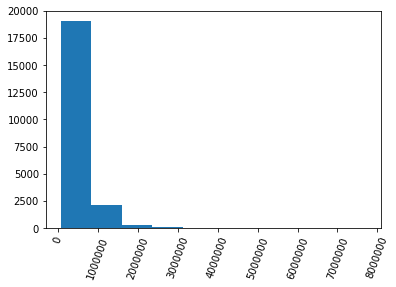

In [28]:
plt.hist(df['price'])
plt.xticks(rotation=70)
plt.show()

In [29]:
def get_VIF(data, target, cols):
    X = data[cols]
    y = data[target]
    ols = sm.OLS(y, X)
    res = ols.fit()
    display(res.summary())
    VIF = 1/(1 - res.rsquared)
    return VIF

In [31]:
get_VIF(df, 'log_sqft_living', ['sqft_living'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        log_sqft_living   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                          1.502e+05
Date:                Tue, 11 Feb 2020   Prob (F-statistic):                        0.00
Time:                        14:39:06   Log-Likelihood:                         -51945.
No. Observations:               21597   AIC:                                  1.039e+05
Df Residuals:                   21596   BIC:                                  1.039e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living     0.0031   8.02e-06    387.594      0.000       0.003       0.003
==============================================================================
Omnibus:                     8662.743   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59939.233
Skew:                          -1.776   Prob(JB):                         0.00
Kurtosis:                      10.348   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

7.956325448693572

### What is something you've learned...
* check residuals (reminding of order of workflow)
* refresh multicollinearity
    * how to make a formula for VIF
* log transformations
* refresh VIF -> multicollinearity
    * check residuals
    * check all values of model
* went through log transformations

In [32]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,log_sqft_living
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.023803,0.008188,-0.010799,0.021617,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.001864
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.036056,0.667951,0.605368,0.053953,-0.053402,0.306692,0.022036,0.585241,0.082845,0.611839
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.026496,0.356563,0.479386,0.155670,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.621820
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,-0.126479,0.665838,0.686668,0.507173,-0.204786,0.024280,0.224903,0.569884,0.088303,0.762135
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,-0.059445,0.762779,0.876448,0.318152,-0.199802,0.052155,0.241214,0.756402,0.184342,0.954607
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.008830,0.114731,0.184139,0.052946,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.150102
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.264075,0.458794,0.523989,0.489193,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.367564
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,1.000000,-0.146896,-0.158904,-0.361592,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,-0.049620
grade,0.008188,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,-0.146896,1.000000,0.756073,0.447865,-0.185771,0.113575,0.200341,0.713867,0.120981,0.743038
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,-0.158904,0.756073,1.000000,0.424037,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.832380


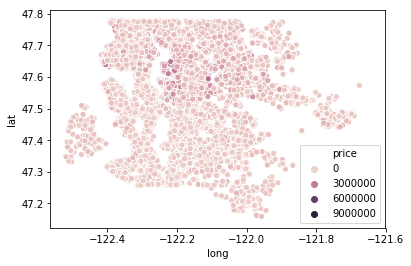

In [47]:
df2 = df.loc[(df['long']<-121.6)]
sns.scatterplot('long', 'lat', hue='price', data=df2)
plt.show()